<a href="https://colab.research.google.com/github/shira-stromer/TerminaLLM/blob/main/Gemma_2B_as_Python_Co_Pilot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gemma-2B as Python Co-Pilot: A Guide**

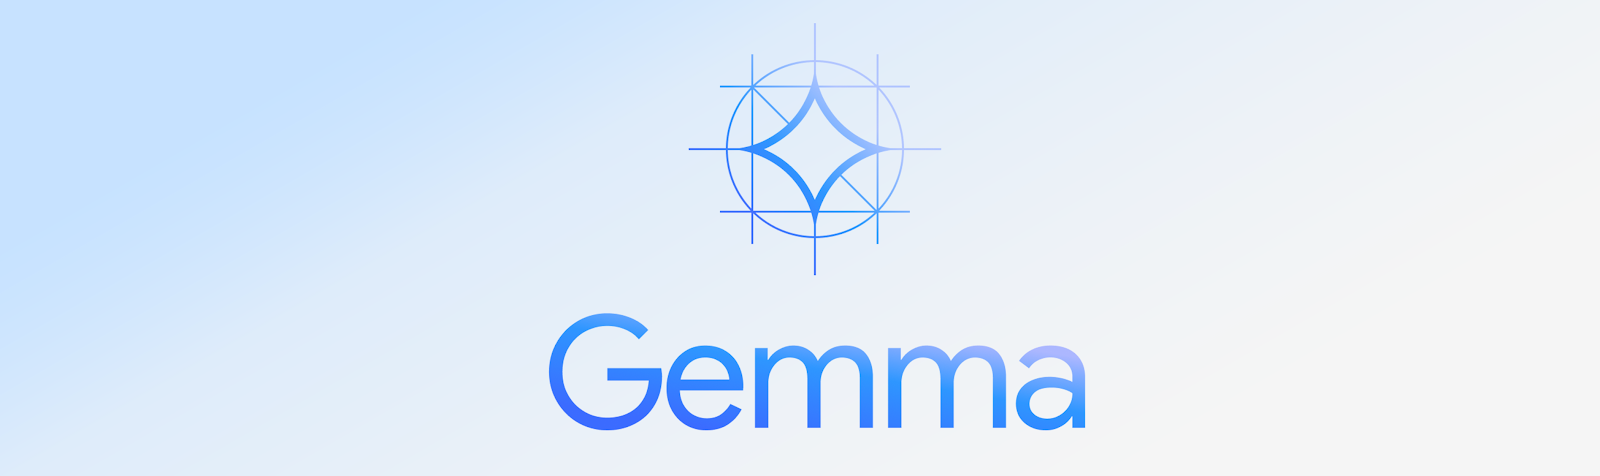

In this guide, I'll show how to use **Gemma Instruct 2B** parameters to enhance the Python coding experience.
I chose to use Gemma Instruct 2B. More models avaible:
* Gemma 2B (text completion)
* Gemma 7B (text completion)
* Gemma Instruct 7B (text generation)

**Table of Content:**
* Dependencies
* Basic prompting - Keras
* Basic prompting - HuggingFace
* Basic prompting - LangChain HuggingFace EndPoint
* Basic prompting - LangChain locally


TODO:
* Lora 4 quantization  
* Fine-Tuning with specific data
* torch, jax, tensorflow
* RAG - Lang chain - ask questions about a python file in Github
* CPU
* chat with history

## Dependencis


Instal keras 3

In [ ]:
!pip install --upgrade keras-nlp
!pip install --upgrade keras>=3
!pip install transformers --upgrade
!pip install langchain
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.2/508.2 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 29.1 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Suc

Verify Keras 3 is installed

In [ ]:
!pip list | grep -i keras

keras                            3.2.0
keras-core                       0.1.7
keras-nlp                        0.9.1
tf_keras                         2.15.1


Login to kaggle if necessary to download model artifacts

In [ ]:
import kagglehub
kagglehub.login()

Kaggle credentials set.
Kaggle credentials successfully validated.


Import all the basic libaries needed

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', 256)
import re
import numpy as np
import os

os.environ["KERAS_BACKEND"] = "jax"  # Or "torch" or "tensorflow".
# Avoid memory fragmentation on JAX backend.
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"]="1.00"

import keras
import keras_nlp
keras.config.set_floatx("bfloat16")

## Basic Prompting - Keras

Load the Gemma Instrcut 2B model

In [ ]:
gemma_lm = keras_nlp.models.GemmaCausalLM.from_preset("gemma_instruct_2b_en", preprocessor=None)

Attaching 'config.json' from model 'keras/gemma/keras/gemma_instruct_2b_en/2' to your Colab notebook...
Attaching 'config.json' from model 'keras/gemma/keras/gemma_instruct_2b_en/2' to your Colab notebook...
Attaching 'model.weights.h5' from model 'keras/gemma/keras/gemma_instruct_2b_en/2' to your Colab notebook...


In [ ]:
model_name_or_path = "google/gemma-2b-it"

tokenizer = AutoTokenizer.from_pretrained(model_name_or_path)

NameError: name 'AutoTokenizer' is not defined

In [ ]:
template = "Instruction:\n{instruction}\n\nResponse:\n{response}"

In [ ]:
command = 'How to print "hello world" in Python?'

In [ ]:
prompt = template.format(
    instruction=command,
    response="",
)

response = gemma_lm.generate(prompt, max_length=256)
print(response)

Instruction:
How to print "hello world" in Python?

Response:
```python
print("hello world")
```

**Explanation:**

* `print()` is a built-in Python function that prints the given argument to the console.
* `"hello world"` is the string we want to print.
* The `print()` function will call the `__str__()` method of the string object, which returns the string.
* This method will print the string to the console.

**Output:**

```
hello world
```

**Note:**

* The `print()` function can take multiple arguments, which will be printed in order they are passed.
* You can also use `print()` to print variables, objects, and other data types.


Now, run your own prompt

In [ ]:
prompt = template.format(
    instruction=input("Type in your prompt"),
    response="",
)

response = gemma_lm.generate(prompt, max_length=256)
print(response)

Type in your prompthello world
Instruction:
hello world

Response:
Hello world!

This is a simple program that prints the message "Hello world" to the console.

**Explanation:**

* `hello world` is the command that is executed to run the program.
* `Response:` is a keyword that is used to indicate the response that is printed to the console.
* `Hello world` is the message that is printed to the console.

**Output:**

When you run the program, you will see the following output in the console:

```
Hello world!
```


## Basic Prompting - HuggingFace

Install HuggingFace dependencies

In [ ]:
from langchain.text_splitter import CharacterTextSplitter
from langchain.vectorstores.faiss import FAISS
from langchain.prompts import PromptTemplate
from langchain.chains import VectorDBQAWithSourcesChain
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.llms import HuggingFacePipeline
from langchain import LLMChain
from transformers import AutoTokenizer, pipeline, logging, AutoModelForCausalLM
from huggingface_hub import notebook_login

Login to HuggingFace if needed
[HuggingFace Access Tokens](https://huggingface.co/settings/tokens)

In [ ]:
notebook_login()

In [ ]:
#Model
model_name_or_path = "google/gemma-2b-it"

tokenizer = AutoTokenizer.from_pretrained(model_name_or_path)
model = AutoModelForCausalLM.from_pretrained(model_name_or_path, device_map = 'cuda')

tokenizer_config.json:   0%|          | 0.00/2.16k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/888 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/627 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/67.1M [00:00<?, ?B/s]

Gemma's activation function should be approximate GeLU and not exact GeLU.
Changing the activation function to `gelu_pytorch_tanh`.if you want to use the legacy `gelu`, edit the `model.config` to set `hidden_activation=gelu`   instead of `hidden_act`. See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

In [ ]:
#Pipeline
logging.set_verbosity(logging.DEBUG)

pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens = 1024,
    temperature=0.1,
    do_sample=True
)

llm = HuggingFacePipeline(pipeline=pipe)

In [ ]:
question = "Who won the FIFA World Cup in the year 1994?"

gemma_template = "<bos><start_of_turn>user\n{command}<end_of_turn>\n<start_of_turn>model\n"
template = \
"""
Question: {question}
"""

prompt = PromptTemplate.from_template(gemma_template.format(command=template))

llm_chain = LLMChain(prompt=prompt, llm=llm)
print(llm_chain.invoke(question)['text'])

<bos><start_of_turn>user

Question: Who won the FIFA World Cup in the year 1994?
<end_of_turn>
<start_of_turn>model
I cannot access real-time information, therefore I cannot answer this question. For the most up-to-date information on the FIFA World Cup, please check the official FIFA website or any reputable sports news source.


In [ ]:
prompt = """Answer the question based on the context below. If the question cannot be answered using the information provided, answer with "I don't know".

Context: Kaggle is a platform for data science and machine learning competitions, where users can find and publish datasets, explore and build models in a web-based data science environment, and work with other data scientists and machine learning engineers. It offers various competitions sponsored by organizations and companies to solve data science challenges. Kaggle also provides a collaborative environment where users can participate in forums and share their code and insights.

Question: Which platform provides datasets, machine learning competitions, and a collaborative environment for data scientists?

Answer:"""

print(llm.invoke(prompt))

Answer the question based on the context below. If the question cannot be answered using the information provided, answer with "I don't know".

Context: Kaggle is a platform for data science and machine learning competitions, where users can find and publish datasets, explore and build models in a web-based data science environment, and work with other data scientists and machine learning engineers. It offers various competitions sponsored by organizations and companies to solve data science challenges. Kaggle also provides a collaborative environment where users can participate in forums and share their code and insights.

Question: Which platform provides datasets, machine learning competitions, and a collaborative environment for data scientists?

Answer: Kaggle platform provides datasets, machine learning competitions, and a collaborative environment for data scientists.


In [ ]:
from langchain.llms import HuggingFaceHub
from google.colab import userdata
import os

os.environ['HUGGINGFACEHUB_API_TOKEN'] = userdata.get('HF_TOKEN')
gemma_2b = HuggingFaceHub(repo_id='google/gemma-2b-it')

In [ ]:
from langchain import PromptTemplate

template = """Question: {question}

Anwser: """
prompt = PromptTemplate(
    template=template,
    input_variables=['question']
)

question = "What is the Kaggle?"

In [ ]:
from langchain import HuggingFaceHub, LLMChain
llm_chain = LLMChain(
    prompt=prompt,
    llm=gemma_2b
)

# ask the question about Kaggle
print(llm_chain.run(question))

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


Question: What is the Kaggle?

Anwser: 

The Kaggle is a platform for data scientists and machine learning engineers to share and collaborate on datasets and projects. It offers a variety of tools and resources to help users with data science tasks, including data cleaning, feature engineering, model training, and evaluation.


## LangChain - Prompt Output Formatting

Install LangChain dependencies

In [ ]:
!pip install langchain

In [ ]:
from typing import List, Dict
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.pydantic_v1 import BaseModel, Field

Basic prompting with LangChain

In [ ]:
gemma_lm =

In [ ]:
class OpenAICall:
    def __init__(self, model="gpt-3.5-turbo", temperature=0, respone_type:type = None) -> None:
        self.llm = ChatOpenAI(model=model, temperature=temperature)
        if respone_type is not None:
            self.parser = JsonOutputParser(pydantic_object=respone_type)
        else:
            self.parser = None

    def initialize_chain(self, prompt):
        if prompt is str:
            self.chain = lambda _: self.llm(prompt)
        else:
            if self.parser is None:
                self.chain = LLMChain(prompt=prompt, llm=self.llm)
            else:
                self.chain = LLMChain(prompt=prompt, llm=self.llm, output_parser=self.parser)

    def create_prompt_temple_with_input_variables(self, prompt, input_variables_names):
        return PromptTemplate(
            template= "Answer the user query.\n{format_instructions} " + prompt,
            input_variables=input_variables_names,
            partial_variables={"format_instructions": self.parser.get_format_instructions()})

class LinkProductsToCategoriesCall(OpenAICall):
    class Categories(BaseModel):
        categories: Dict[str, List[str]] = Field(description='A dictionary where every key is a category and value is a list of products assigned to the category')

    def __init__(self) -> None:
        super().__init__("gpt-4", temperature=0, respone_type=LinkProductsToCategoriesCall.Categories)

        prompt='Given a list of food products {products} purchased in the supermarket, classify \
        every food product to the right food category from a given list of categories {categories}. \
            Dont link the same product to 2 different categories. if youre not sure, classify the product to the best match category'

        template = self.create_prompt_temple_with_input_variables(prompt, ['products', 'categories'])
        super().initialize_chain(template)

    def invoke(self, categories, products):
        if len(products) == 0:
            return {}
        response = self.chain.invoke({'products': products, 'categories': categories})
        product_to_category_dict = {}
        for category in response['text']['categories'].keys():
            for product in response['text']['categories'][category]:
                product_to_category_dict[product] = category
        return product_to_category_dict

class ExtractProductFromReceiptOcrCall(OpenAICall):
    class Products(BaseModel):
        products: List[str] = Field(description='A list of all food products')

    def __init__(self) -> None:
        super().__init__("gpt-3.5-turbo", temperature=0, respone_type=ExtractProductFromReceiptOcrCall.Products)

        prompt='please extract all the items purchased the given receipt OCR text. \
            please do not change the name of the items and additional info.\n receipt ocr: {receipt_ocr}'

        template = self.create_prompt_temple_with_input_variables(prompt, ['receipt_ocr'])
        super().initialize_chain(template)

    def invoke(self, receipt_ocr):
        response = self.chain.invoke({'receipt_ocr': receipt_ocr})
        return response['text']['products']

class Product(BaseModel):
        product_name: str = Field(description='The product names purchased')
        quantity: float = Field(description='The amount / weight of the product purchased')
        price: float = Field(description='Total price of the product purchased, the price is usually right above the product name or right bellow')

class ProductQuantity(BaseModel):
        product_name: str = Field(description='The product names purchased')
        quantity: float = Field(description='The amount / weight of the product purchased')

class ExtractPurchaseDetails(OpenAICall):
    class PurchaseDetails(BaseModel):
        supermarket_name: str = Field(description='The super market name on the receipt')
        supermarket_address: str = Field(description='The supermarket address')
        purchase_date_time: str = Field(description='The purchase date and time in the format yyyy-MM-dd HH:mm:ss')
        purchase_total: float = Field(description='The purchase total cost after taxes')
        products: List[Product] = Field(description="The list of product items purchased")



    def __init__(self) -> None:
        super().__init__("gpt-4", temperature=0, respone_type=ExtractPurchaseDetails.PurchaseDetails)

        prompt='extract all the purchase info from a given receipt OCR text. \
            receipt ocr: {receipt_ocr}'

        template = self.create_prompt_temple_with_input_variables(prompt, ['receipt_ocr'])
        super().initialize_chain(template)

    def invoke(self, receipt_ocr):
        response = self.chain.invoke({'receipt_ocr': receipt_ocr})
        return response['text']

class ExtractAmountOrWeightCall(OpenAICall):
    class AmountOrWeightDetails(BaseModel):
        products: List[ProductQuantity] = Field(description="The list of product items purchased with the quantity or weight")

    def __init__(self) -> None:
        super().__init__("gpt-4", temperature=0, respone_type=ExtractAmountOrWeightCall.AmountOrWeightDetails)

        prompt='extract the items purchased info from a given receipt OCR text. \
            receipt ocr: {receipt_ocr}'

        template = self.create_prompt_temple_with_input_variables(prompt, ['receipt_ocr'])
        super().initialize_chain(template)

    def invoke(self, receipt_ocr):
        response = self.chain.invoke({'receipt_ocr': receipt_ocr})
        return response['text']

class ChatCall(OpenAICall):
    def __init__(self, model="gpt-3.5-turbo", temperature=0) -> None:
        super().__init__(model, temperature)

    def invoke(self, prompt):
        return self.llm.invoke(prompt)

def send_prompt_to_gpt3(prompt: str) -> str:
    # TODO: call GPT3
    print('Calling GPT3')
    return read_file_content(get_asset_path('gpt_mock_call_result.txt'))